In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline
import random

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print(Z.shape)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_0 = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_0 = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_1 = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_1 = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]
    grade_2 = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==2]
    bumpy_2 = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==2]

    plt.scatter(grade_0, bumpy_0, color = "b", label="0")
    plt.scatter(grade_1, bumpy_1, color = "w", label="1")
    plt.scatter(grade_2, bumpy_2, color = "r", label="2")
    plt.legend()
    plt.xlabel("x1")
    plt.ylabel("x2")

    plt.savefig("plot.png")

In [3]:

def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    x1 = [random.random() for ii in range(0,n_points)]
    x2 = [random.random() for ii in range(0,n_points)]
    
    y = [round(x1[ii]*x2[ii]+0.3+0.1*x1[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(x1)):
        if ((x1[ii]-0.5)**2+(x2[ii]-0.5)**2)<0.1:
            y[ii] = 2.0
        elif (0.1<=(x1[ii]-0.5)**2+(x2[ii]-0.5)**2<0.25):
            y[ii] = 1.0
        else:
            y[ii]=0.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(x1, x2)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    return X_train, y_train, X_test, y_test



In [4]:
def evaluate_classifier(clf,features_train,features_test,labels_train,labels_test):
    clf.fit(features_train, labels_train)
    ### draw the decision boundary with the text points overlaid
    prettyPicture(clf, features_test, labels_test)
    pred = clf.predict(features_test)
    #accuracy = accuracy_score(labels_test, pred)
    print("Training Score:",clf.score(features_train,labels_train))
    print("Testing Score:",clf.score(features_test,labels_test))
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(labels_test, pred, target_names=target_names))
    #print("Accurcy:",accuracy)
    #output_image("test.png", "png", open("test.png", "rb").read())

In [5]:
features_train, labels_train, features_test, labels_test = makeTerrainData(10000)

(10000,)
Training Score: 0.6605333333333333
Testing Score: 0.6636
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       528
     class 1       0.59      1.00      0.74      1202
     class 2       1.00      0.59      0.74       770

   micro avg       0.66      0.66      0.66      2500
   macro avg       0.53      0.53      0.50      2500
weighted avg       0.59      0.66      0.59      2500



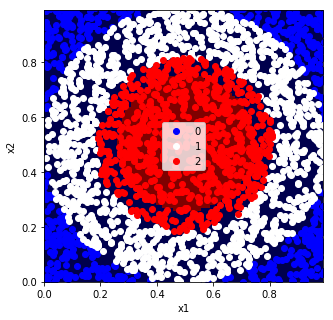

In [6]:
clf=GaussianNB()
evaluate_classifier(clf,features_train,features_test,labels_train,labels_test)


(10000,)
Training Score: 0.9593333333333334
Testing Score: 0.962
              precision    recall  f1-score   support

     class 0       1.00      0.84      0.91       528
     class 1       0.93      1.00      0.96      1202
     class 2       0.99      0.99      0.99       770

   micro avg       0.96      0.96      0.96      2500
   macro avg       0.97      0.94      0.96      2500
weighted avg       0.96      0.96      0.96      2500



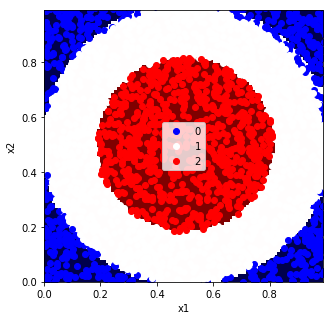

In [7]:
clf=svm.SVC()
evaluate_classifier(clf,features_train,features_test,labels_train,labels_test)

(10000,)
Training Score: 0.6953333333333334
Testing Score: 0.7024
              precision    recall  f1-score   support

     class 0       1.00      0.34      0.51       528
     class 1       0.70      0.68      0.69      1202
     class 2       0.66      0.99      0.79       770

   micro avg       0.70      0.70      0.70      2500
   macro avg       0.79      0.67      0.66      2500
weighted avg       0.75      0.70      0.68      2500



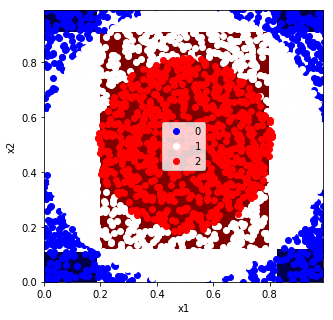

In [8]:
clf=AdaBoostClassifier()
evaluate_classifier(clf,features_train,features_test,labels_train,labels_test)

(10000,)
Training Score: 0.9990666666666667
Testing Score: 0.978
              precision    recall  f1-score   support

     class 0       0.98      0.97      0.97       528
     class 1       0.97      0.98      0.98      1202
     class 2       0.99      0.98      0.98       770

   micro avg       0.98      0.98      0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



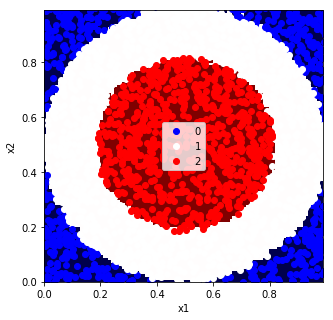

In [9]:
clf=RandomForestClassifier()
evaluate_classifier(clf,features_train,features_test,labels_train,labels_test)

(10000,)
Training Score: 0.9908
Testing Score: 0.9804
              precision    recall  f1-score   support

     class 0       0.98      0.96      0.97       528
     class 1       0.98      0.98      0.98      1202
     class 2       0.99      0.99      0.99       770

   micro avg       0.98      0.98      0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



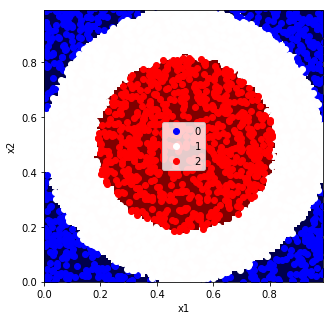

In [10]:
clf=KNeighborsClassifier()
evaluate_classifier(clf,features_train,features_test,labels_train,labels_test)
